# Missing Values Treatment

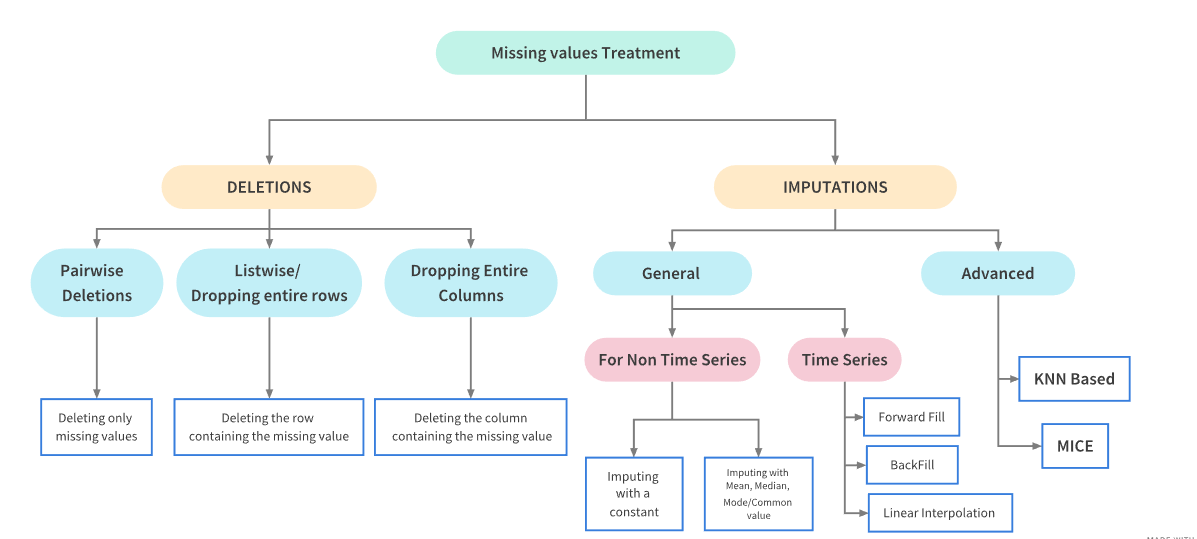

In [109]:
#Import the Dataset

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [111]:
# Loading and Reading the Dataset

In [112]:
df= sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [113]:
df.shape

(891, 15)

In [114]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [115]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

# Detecting Missing Values by Visual Representation

<AxesSubplot:>

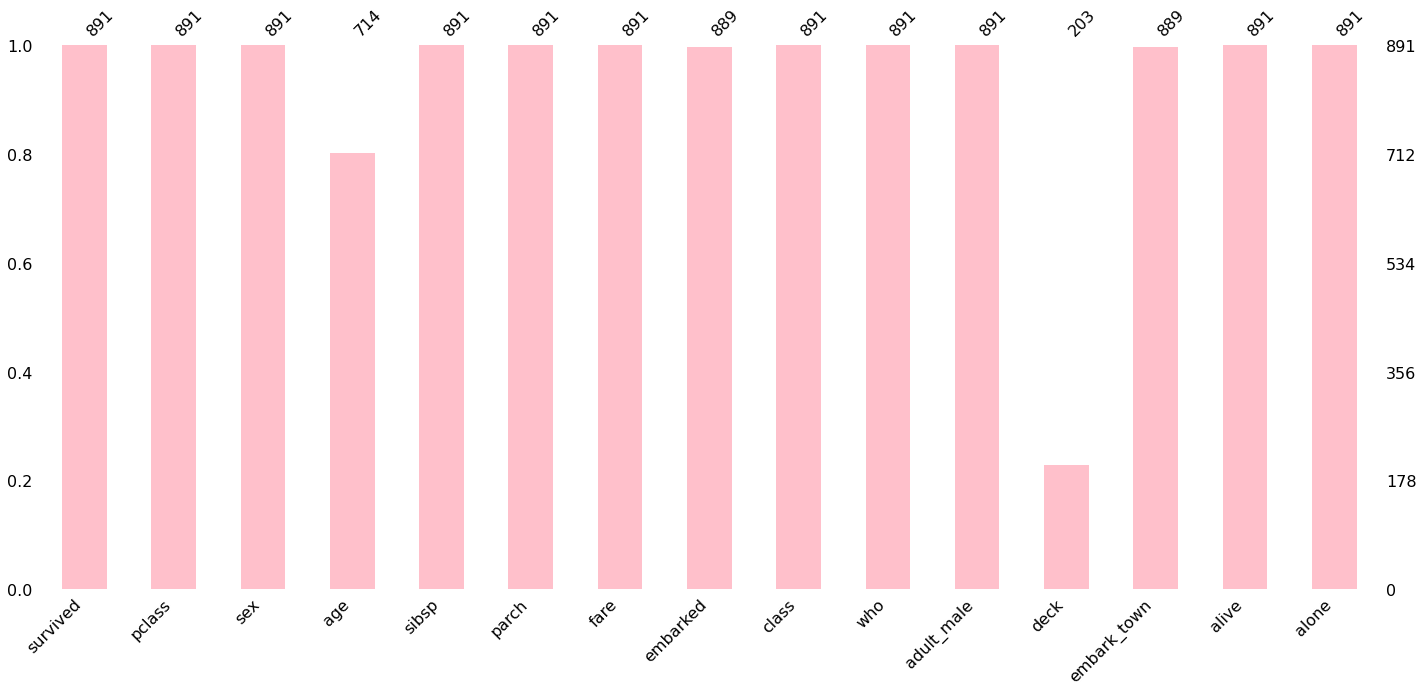

In [116]:
msno.bar(df,color='pink')

The bar chart above gives a quick graphical overview of the completeness of the dataset. We can see that Age, Cabin and embarked columns have missing values. Next,it would make sense to find out the locations of the missing data.



# Finding Correlation between missing data using Dendrogram

A dendogram is a tree diagram of missingness. It groups the highly correlated variables together

<AxesSubplot:>

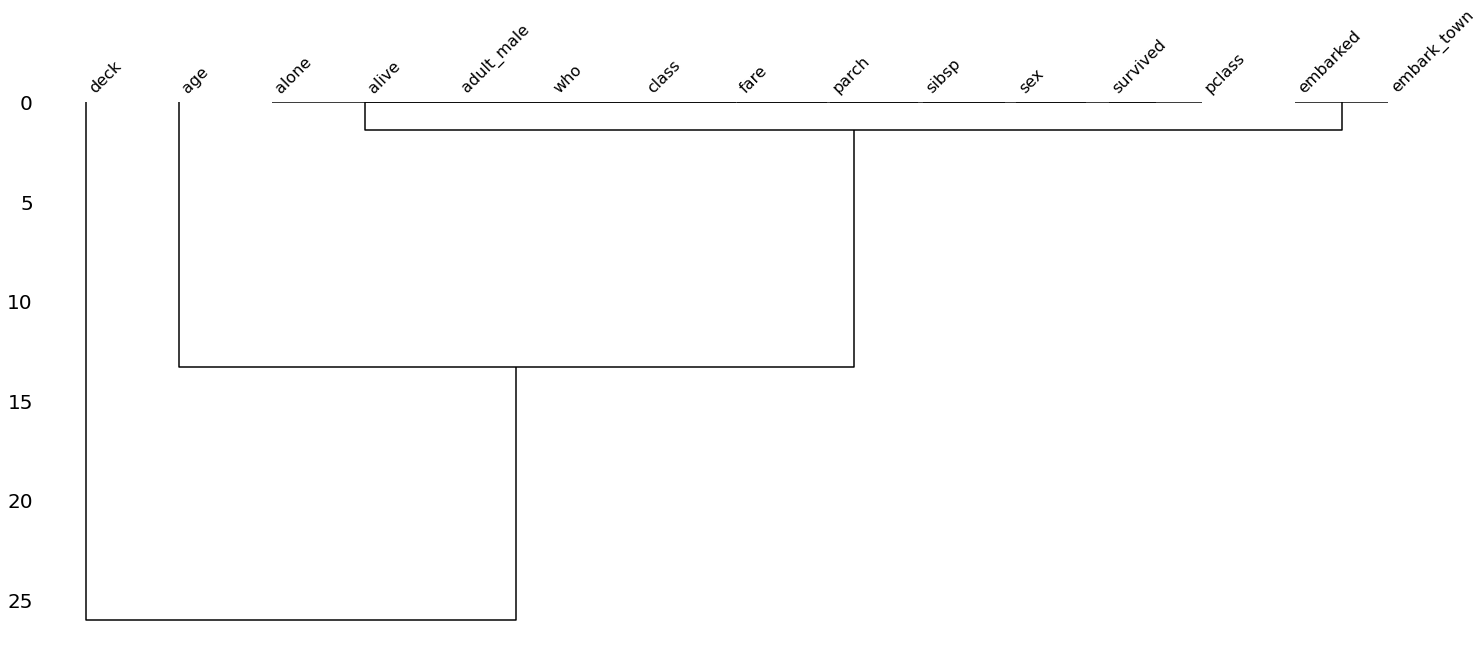

In [117]:
msno.dendrogram(df)

# Treating Missing Values

After having identified the patterns in missing values, it is important to treat them too. Here is a flowchart which could prove handy



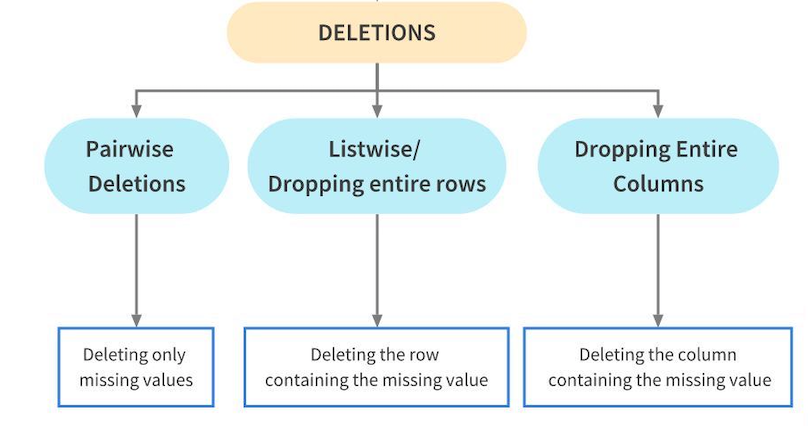

Deletion means to delete the missing values from a dataset. This is however not recommended as it might result in loss of information from the dataset. We should only delete the missing values from a dataset if their proportion is very small. Deletions are further of three types:

In [118]:
df1=df.copy()

In [119]:
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [120]:
# Deleting the Row containing missing value and columns deletion axis=1
df1.dropna(inplace=True , axis= 0)

In [121]:
df1.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

If a column contains a lot of missing values, say more than 80%, and the feature is not significant, you might want to delete that feature. However, again, it is not a good methodology to delete data.

# Basic Imputation Techniques For Non Time Series Data

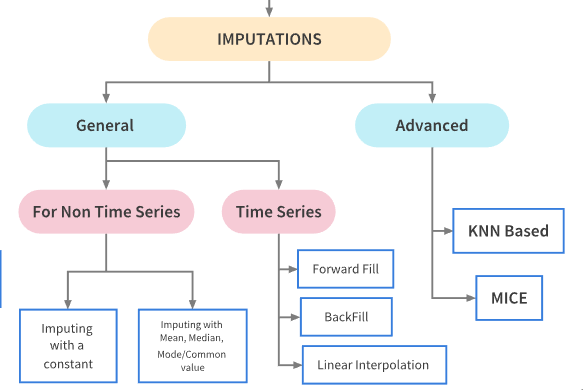

# 1.  Imputing with a Constant , Mean, Median and Mode

In [122]:
df2=df.copy()

In [123]:
from sklearn.impute import SimpleImputer
mean_imputer=SimpleImputer(strategy='constant')  #Imputing using constant value
df2.iloc[:,:]=mean_imputer.fit_transform(df2)

In [124]:
df2.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [125]:
df3=df.copy()

In [126]:
df3.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [127]:
# if we don't want to use sklearn library for imputation then we can directly use mean, mode , median inbuilt functions
df3['age']=df3['age'].fillna((df3['age'].median()))

In [128]:
# For categorical columns we can only replace with mode
df3['embarked']=df3['embarked'].fillna((df3['embarked'].mode()[0]))

In [129]:
df3.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

# Imputation Techniques for Time Series Problem

The dataset is called Air Quality Data in India (2015 - 2020) Tand it contains air quality data and AQI (Air Quality Index) at hourly and daily level of various stations across multiple cities in India.The dataset has a lot of missing values and and is a classic Time series problem.

In [130]:
df=pd.read_csv('cities_by_day.csv')
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket
0,Ahmedabad,1/1/2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,1/2/2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,1/3/2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,1/4/2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,1/5/2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [131]:
df.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
C6H6           5623
C7H8           8041
C8H10         18109
AQI            4681
AQI_Bucket     4681
dtype: int64

# Imputation using ffill & bfill

In [132]:
df1=df.copy()
df.fillna(method='ffill',inplace=True)  # for backword fill method='bfill'
df.isna().sum()

City             0
Date             0
PM2.5           27
PM10          1594
NO               0
NO2              0
NOx              0
NH3           2009
CO               0
SO2              0
O3               0
C6H6             0
C7H8             0
C8H10            0
AQI             28
AQI_Bucket      28
dtype: int64

# Imputation using Linear Interpolation method

Linear interpolation is an imputation technique that assumes a linear relationship between data points and utilises non-missing values from adjacent data points to compute a value for a missing data point.

In [133]:
# Interpolate using the linear method
df2=df.copy()
df2.interpolate(limit_direction="both",inplace=True)
df2.isna().sum()

City           0
Date           0
PM2.5          0
PM10           0
NO             0
NO2            0
NOx            0
NH3            0
CO             0
SO2            0
O3             0
C6H6           0
C7H8           0
C8H10          0
AQI            0
AQI_Bucket    28
dtype: int64

# Nearest neighbors imputation

In [134]:
train=sns.load_dataset('titanic')

In [135]:
from sklearn.impute import KNNImputer

In [161]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=2)
train['age'] = knn_imputer.fit_transform(train[['age']])

In [162]:
train.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

# Conclusion

Well, there is no single best way to handle missing values. One needs to experiment with different methods and then decide which method is best for a particular problem.

# Outlier Treament

In [138]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot:ylabel='age'>

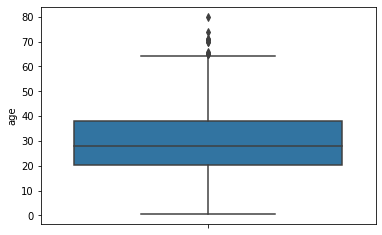

In [139]:
sns.boxplot(data=df,y='age')

In [140]:
Q1_age,Q3_age=df['age'].quantile([0.25,0.75])
print('Q1_age 25 percentile of given data is ',Q1_age)
print('Q3_age 75 percentile of given data is ',Q3_age)
IQR_age=Q3_age-Q1_age
print('interceptile Range of given data is ',IQR_age)
low_lim=Q1_age-1.5*IQR_age
up_lim=Q1_age+1.5*IQR_age
print('low_lim is ',low_lim)
print('up_lim is ',up_lim)
Outlier=[]
for x in df['age']:
    if ((x>up_lim)or (x<low_lim)):
        Outlier.append(x)
        
print('outlier in the dataset', Outlier)


Q1_age 25 percentile of given data is  20.125
Q3_age 75 percentile of given data is  38.0
interceptile Range of given data is  17.875
low_lim is  -6.6875
up_lim is  46.9375
outlier in the dataset [54.0, 58.0, 55.0, 66.0, 49.0, 65.0, 59.0, 71.0, 47.0, 70.5, 54.0, 47.0, 51.0, 55.5, 51.0, 61.0, 56.0, 50.0, 58.0, 51.0, 59.0, 54.0, 62.0, 50.0, 52.0, 58.0, 63.0, 65.0, 50.0, 54.0, 61.0, 60.0, 51.0, 50.0, 64.0, 52.0, 49.0, 65.0, 50.0, 48.0, 47.0, 48.0, 56.0, 50.0, 63.0, 58.0, 55.0, 71.0, 54.0, 54.0, 47.0, 50.0, 50.0, 64.0, 62.0, 48.0, 62.0, 53.0, 54.0, 47.0, 60.0, 52.0, 47.0, 49.0, 49.0, 61.0, 57.0, 80.0, 51.0, 48.0, 56.0, 58.0, 50.0, 47.0, 70.0, 60.0, 60.0, 52.0, 49.0, 48.0, 52.0, 50.0, 48.0, 70.0, 48.0, 51.0, 48.0, 57.0, 54.0, 49.0, 52.0, 62.0, 74.0, 51.0, 48.0, 47.0, 47.0, 56.0]


In [141]:
df = df[df['age']< up_lim]

<AxesSubplot:ylabel='age'>

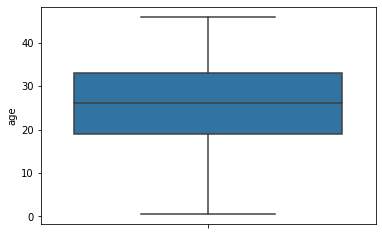

In [142]:
sns.boxplot(data=df,y='age')

Now the dataset is Outlier free.

# Feature Encoding

In [143]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [144]:
df['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [145]:
# If column having 2 labels then we can simply encode it
df['gender']=df.sex.map({'male':0, 'female':1})


In [146]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,gender
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0


In [147]:
df['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [148]:
# if column having more than 2 categories then we can use onehotencoding
df = pd.get_dummies(df['embarked']).iloc[:, 1:]


In [149]:
df.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


# Feature Scaling

In [150]:
data = pd.read_csv('Social_Network_Ads.csv')
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values


In [151]:
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [152]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [153]:
from sklearn.preprocessing import StandardScaler
col=StandardScaler()
x_train=col.fit_transform(x_train)
x_test=col.transform(x_test)

In [154]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [155]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(x_test)
accuracy_score(y_test,y_pred)


0.95

In [156]:
# Let's Check the accuracy without using feature scaling

In [157]:
data = pd.read_csv('Social_Network_Ads.csv')
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values


In [158]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [159]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [160]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(x_test)
accuracy_score(y_test,y_pred)


0.825

Examples of Algorithms where Feature Scaling matters
1. K-Means uses the Euclidean distance measure here feature scaling matters.
2. K-Nearest-Neighbours also require feature scaling.
3. Principal Component Analysis (PCA): Tries to get the feature with maximum variance, here too feature scaling is required.
4. Gradient Descent: Calculation speed increase as Theta calculation becomes faster after feature scaling.

Note: Naive Bayes, Linear Discriminant Analysis, and Tree-Based models are not affected by feature scaling.

# Thank you